#### Load Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

In [2]:
#Create a DataFrame
tanz = pd.read_csv('training.csv')

In [3]:
tanz.head(3)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2


### Rename columns accordingly

In [4]:
# Renaming Columns 
columns_names = {"Q1":"age", "Q2": "gender", "Q3":"marital_status",
                 "Q4":"education", "Q5":"residents", "Q6": "land_ownership",
                 "Q7": "mobile_phone_ownership", "Q8_1": "salaries_or_Wages",
                 "Q8_2": "trading", "Q8_3": "services", "Q8_4": "piece_work",
                 "Q8_5": "rental_income", "Q8_6": "interest", "Q8_7": "pension",
                 "Q8_8": "welfare", "Q8_9": "rely_on_someone", "Q8_10": "dependent",
                 "Q8_11": "other", "Q9": "employeer", "Q10": "trading_goods", 
                 "Q11": "type_of_Service", "Q12":"sent_money", "Q13": "transfer_money",
                 "Q14": "received_money", "Q15": "received_money_days", "Q16":"usage_goods_services", "Q17":"usage_bills",
                 "Q18": "literacy_in_kiswhahili", "Q19": "literacy_in_english"}

tanz = tanz.rename(columns_names, axis=1)

# Adding categorical variables
gender_names = {1: "Male", 2: "Female"}
tanz["Gender"] = tanz["gender"].map(gender_names)

marital_names ={1: "Married", 2: "Divorced", 3: "Widowed", 4: "Single/Never Married"}
tanz["Marital Status"] = tanz["marital_status"].map(marital_names)

education_names = {1: "No Formal Education", 2: "Some Primary", 3: "Primary Completed", 4: "Post Primary", 5: "Some Secondary", 6: "University", 7: "Don't Know"}
tanz["Education"] = tanz["education"].map(education_names)

land_ownership_names = {1: "Yes", 2: "No"}
tanz["Land Ownership"] = tanz["land_ownership"].map(land_ownership_names)

usage_goods_services_names = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
tanz["Usage Goods Service"] = tanz["usage_goods_services"].map(usage_goods_services_names)

usage_bills_names = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
tanz["Usage Bills"] = tanz["usage_bills"].map(usage_bills_names)

mobile_money_classification_names = {0: "No Mobile Money and no other Financial Service", 1: "No Mobile Money, one other financial service", 2: "Mobile Money Only", 3: "Mobile Money plus"}
tanz["Mobile Money Classification"] = tanz["mobile_money_classification"].map(mobile_money_classification_names)

In [ ]:
col_names =                 {'Q1':'Age',
                             'Q2':'Gender',
                             'Q3':'Marital_status',
                             'Q4':'Level_of_education',
                             'Q5':'Land_ownership',
                             'Q6':'Other_land_ownership',
                             'Q7':'Owning_a_mobile_phone',
                             'Q9':'Employer',
                             'Q10':'Product_sold',
                             'Q11':'Service_provided',
                             'Q13':'sending_money_out_date',
                             'Q15':'recent_date_money_recieved',
                             'Q14':'cash_recieved_non_domestically',
                             'Q16':'purchasing_frequency_for_using_mobile_money',
                             'Q17':'bill_frequency_for_using_mobile_money','Q18':'Literacy_in_Kiswhahili','Q19':'English_literacy',
                             'Q8_1':'Salaries',
                             "Q8_2":'Trading',
                             'Q8_3':'Service',
                             'Q8_4':'Casual_work',
                             'Q8_5':'Rental',
                             'Q8_6':'Interest',
                             'Q8_7':'Pension',
                             'Q8_8':'Social_welfare',
                             'Q8_9':'Dependent',
                             'Q8_10':'Dont_get_money',
                             'Q8_11':'Other'
                              }

tanz = tanz.rename(col_names, axis=1)

gen = {1: "Male", 2: "Female"}
tanz["Gender"] = tanz["gender"].map(gen)

marital_stat ={1: "Married", 2: "Divorced", 3: "Widowed", 4: "Single/Never Married"}
tanz["Marital_status"] = tanz["marital_status"].map(marital_stat)

education_rank = {1: "No Formal Education", 2: "Some Primary", 3: "Primary Completed", 4: "Post Primary", 5: "Some Secondary", 6: "University", 7: "Don't Know"}
tanz["Level_of_education"] = tanz["education"].map(education_rank)

land_ownership = {1: "Yes", 2: "No"}
tanz["Land_ownership"] = tanz["land_ownership"].map(land_ownership)

# usage_goods_services = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
# data["Usage Goods Service"] = data["usage_goods_services"].map(usage_goods_services_names)

# usage_bills_names = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
# data["Usage Bills"] = data["usage_bills"].map(usage_bills_names)

# mobile_money_classification_names = {0: "No Mobile Money and no other Financial Service", 1: "No Mobile Money, one other financial service", 2: "Mobile Money Only", 3: "Mobile Money plus"}
# data["Mobile Money Classification"] = data["mobile_money_classification"].map(mobile_money_classification_names)

In [5]:
tanz.head(3)

,ID,age,gender,marital_status,education,residents,land_ownership,mobile_phone_ownership,salaries_or_Wages,trading,...,borrowing,insurance,mobile_money_classification,Gender,Marital Status,Education,Land Ownership,Usage Goods Service,Usage Bills,Mobile Money Classification
0,5086,98,2,3,1,1,2,2,0,0,...,0,0,0,Female,Widowed,No Formal Education,No,Never,not applicable,No Mobile Money and no other Financial Service
1,1258,40,1,1,3,5,1,1,1,0,...,1,0,3,Male,Married,Primary Completed,Yes,Monthly,Monthly,Mobile Money plus
2,331,18,2,4,6,3,2,1,0,0,...,0,0,2,Female,Single/Never Married,University,No,Never,not applicable,Mobile Money Only


In [ ]:
date = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['sending_money_out_date']=tanz.sending_money_out_date.map(date)

In [ ]:
received = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['recent_date_money_recieved']=tanz.recent_date_money_recieved.map(received)

In [7]:
tanz.describe()

,ID,age,gender,marital_status,education,residents,land_ownership,mobile_phone_ownership,salaries_or_Wages,trading,...,usage_bills,literacy_in_kiswhahili,literacy_in_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


#### Examining Dataset for any missing values

In [8]:
tanz.isnull().sum()

ID                             0
age                            0
gender                         0
marital_status                 0
education                      0
residents                      0
land_ownership                 0
mobile_phone_ownership         0
salaries_or_Wages              0
trading                        0
services                       0
piece_work                     0
rental_income                  0
interest                       0
pension                        0
welfare                        0
rely_on_someone                0
dependent                      0
other                          0
employeer                      0
trading_goods                  0
type_of_Service                0
sent_money                     0
transfer_money                 0
received_money                 0
received_money_days            0
usage_goods_services           0
usage_bills                    0
literacy_in_kiswhahili         0
literacy_in_english            0
Latitude  

There are no missing values in the dataset. Everything is accounted for.

#### Financial services accessed.

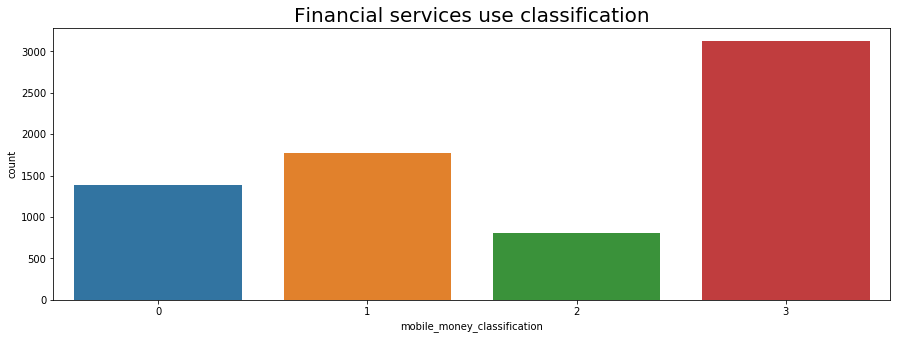

In [9]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='mobile_money_classification',data=tanz)
plt.title('Financial services use classification',fontdict=fontdict)
plt.show()


The chart above shows that people use mobile and atleast one other financial service.

### Financial services classification and Age

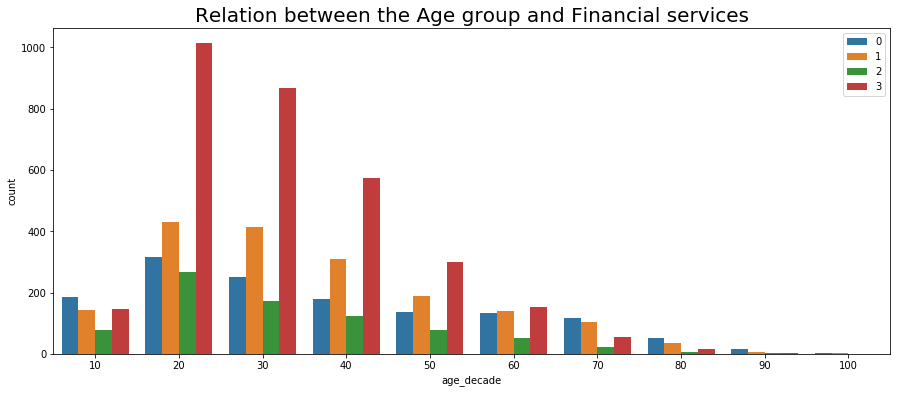

In [11]:
tanz['age_decade']=tanz.age.apply(lambda x : int(x/10)*10)
plt.figure(figsize=(15,6))
fontdict={'fontsize':20}
sns.countplot(x='age_decade',hue='mobile_money_classification',data = tanz)
plt.legend(loc='upper right')
plt.title('Relation between the Age group and Financial services',fontdict=fontdict)
plt.show()

People within the 20 & 30 year old age group mostly use mobile money and another financial service.

### Financial services classification and Gender

In [12]:
gender={1:'Male',2:'Female'}
tanz['Gender']=tanz.Gender.map(gender)

IndexError: too many indices for array

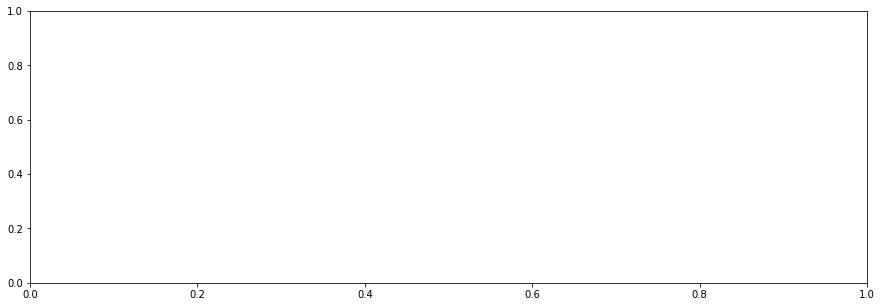

In [13]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Gender',hue='mobile_money_classification',data=tanz)
plt.legend(loc='upper right')
plt.title('Relation between Gender and Financial services used',fontdict=fontdict)
plt.show()

Females use more mobile money than Males.

### Financial services classification and Marital Status

In [ ]:
status = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
tanz['Marital_status']=tanz.Marital_status.map(status)

In [ ]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=tanz)
plt.title('The relation between Marital status and Financial services used',fontdict=fontdict)
plt.show()

Married people have the highest occurence of using mobile money and at leats one other service. this could be attributed to the increased responsibility of joint living and family obligations.

### Financial services classification and Land ownership

In [ ]:
land = {1:'Yes',2:'No'}
tanz['Other_land_ownership']=tanz.Other_land_ownership.map(land)

In [ ]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=tanz)
plt.title('Relationship between Land ownership and Financial services used',fontdict=fontdict)
plt.show()

###  Financial services classification and the Types of income

In [ ]:
data_frame = tanz[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]

In [ ]:
plt.figure(figsize=(25,7))
fontdict={'fontsize':20}
sns.set(font_scale=1.5)
sns.countplot(counts.variable,hue= 'mobile_money_classification',data =counts)
plt.legend(loc='upper right')
plt.title('The relation between the Types of income and Financial services used',fontdict=fontdict)
plt.show()

## How often are mobile money services used?

### How often  Mobile money services are used  and Age

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(30, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1.5)
sns.countplot(x='age_decade',hue='sending_money_out_date',data=tanz, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=tanz,ax =axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and Age',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Age',fontdict=fontdict)
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

###  How often  Mobile money services are used  and Gender

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(20, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Gender',hue='sending_money_out_date',data=tanz, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=tanz,ax = axes[1])
axes[0].set_title('The relation between how often money is sent and Gender',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Gender',fontdict=fontdict)
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

###   How often  Mobile money services are used and Maritul status


In [ ]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Marital status',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Marital status',fontdict=fontdict)
fontdict={'fontsize': 20,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
plt.show()


*Mostly married people sent and recieved money in the past 30 days.*

### How often  Mobile money services are used  and Land ownership

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Land ownership',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Land ownership',fontdict=fontdict)
plt.show()


### How often  Mobile money services are used  and  the Type of income

In [ ]:
f, axes = plt.subplots(2, 1,figsize=(25, 15))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and the Type of income',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and the Type of income',fontdict=fontdict)

plt.show()

## 6.Demographic factors associated with mobile money

In [ ]:
a = {1:'Yes',2:'No'}
tanz['Owning_a_mobile_phone']=tanz.Owning_a_mobile_phone.map(a)

In [ ]:
b ={-1:'N/A',1:'crops',2:'livestock product',3:'livestock',4:'aquaculture',
            5:'Agriculture products',6:'Non agriculture',7:'crafts',8:'collection',9:'processed',10:'other'}
tanz['Product_sold']=tanz.Product_sold.map(b)

In [ ]:
f, axes = plt.subplots(2, 1,figsize=(32, 20))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=tanz,ax=axes[0])
sns.countplot(x='Product_sold',data=tanz,ax= axes[1])
axes[0].legend(loc='upper right')
axes[0].set_title('The relation between Owning a mobile phone and using financial services',fontdict=fontdict)
axes[1].set_title('The trading products',fontdict=fontdict)
plt.show()



In [ ]:
c ={1:'no formal education',2:'some primary',3:'primary completed',
           4:'post primary',5:'some secondary',6:'higher education',7:'do not know'}
tanz['Level_of_education']=tanz.Level_of_education.map(c)

In [ ]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize':20}
sns.set(font_scale=2)
sns.countplot(x='Level_of_education',hue='age_decade',data=training_data,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between Education level and Age',fontdict=fontdict)
axes[1].set_title('The relation between Types of income and Gender',fontdict=fontdict)
plt.show()